In [129]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from PIL import Image
import random
from urllib.request import urlopen

In [130]:
weights=r'C:\Users\ATHUL AKSHAY\Desktop\Machine Learning Projects\Yolo Library\yolov3.weights'
configuration=r'C:\Users\ATHUL AKSHAY\Desktop\Machine Learning Projects\Yolo Library\yolov3.cfg'
classnames=r'C:\Users\ATHUL AKSHAY\Desktop\Machine Learning Projects\Yolo Library\coco.names'
yolov3=cv2.dnn.readNet(weights,configuration)

In [131]:
classes=[]
with open(classnames) as f:
    classes=[line.strip() for line in f.readlines()]
    # classes=f.read()
print(classes)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [132]:
classes[:3]

['person', 'bicycle', 'car']

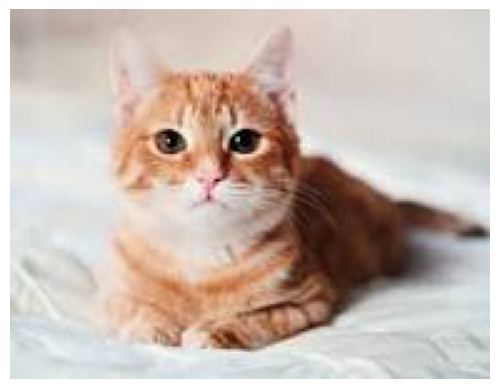

In [133]:
img=Image.open(urlopen('data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBwgHBgkIBwgKCgkLDRYPDQwMDRsUFRAWIB0iIiAdHx8kKDQsJCYxJx8fLT0tMTU3Ojo6Iys/RD84QzQ5OjcBCgoKDQwNGg8PGjclHyU3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3N//AABEIAJQAwAMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAADAAIEBQYBBwj/xAA7EAACAQMDAgQEBAUBCAMAAAABAgMABBEFEiExQQYTIlEyYXGBFCNCkQdSYqHB8DM0Q1NygrHRFSQl/8QAGQEAAwEBAQAAAAAAAAAAAAAAAQIDAAQF/8QAIhEAAgIDAAICAwEAAAAAAAAAAAECEQMSIRMxBEEUImFR/9oADAMBAAIRAxEAPwDTJJRi/pqMI2D4qUkRK1MrY1Xom8YrggpywUA2h6HIGKIATjA6V2OPAqZEg5XFYJHTJ57U/FEeMKflTlUEUAAsGugUQrim4rGEKIKSrRAvFYwzOBSLBfiOK65EaNI/QdB71VXdwZDt3ZzRGSstwa7uqPAxMS5POKKDWAwtcz703NIURB9KlSogOUsV2kKIBhFcxRMU2sBlLsG7OKkInFP/AAzA5oqxEDmlGAhaIqinFcV1AaBjoXpRA4SUg9zSA4+lMvIw0itg5Hq4oWUgr4PnoEUoztJqRIV8vqKpr1pUy0YJP7UuSWqsfHDbhcY+9IIazNxqV3a2zSyOfQB6cdPnU6ZruSM4mCsw3RsB2x3+9S/IiV/Gl/peBcUmIAyTgDqayNxr09gYoruQszvglP0gjIH7U+TVLl9sbTCQ7Rux+qt54mXxZe2XN9cmYfljcnbFV6YedYwhB75FHtrlFCm5j2uw469KSCKO7Eu44/lIroXVZL06LCP0qB7UUGmBSVya6BiiTbCA04Gh0qwobNdzQs13NEATNdoQNPB4ogHVw0ga7WAx+1a6I1rmKetajWDaJfam+WBRqYaFGsGy8UC5dYlWSY4xwtHZsVEv3DQqrDPOMUs1SLYeyFbyGUM5H5fbNQNQLTSJtJ2j9I70aKULAsMZ6U5rSQIMY/7jiuOcnLiOyKUXbIE9u8kBt8AvKCF45qJLePDapFPhSj+XkdRjr/r5VewQyf8AzCyPGyosBKntnpVR4iso2EAAO0NvBHuTk5/12pHCujrIm6KG/ivJbqEW35gtohK5IBOD/ihzbtnn7gVfJh2H54rQ6YbRJjK64mnUIxz8QAAx/ao2k6fJH4cZJl8siZliaTGdo6Uyx30Pm7RX2uovJbusspWQJhXxjH0p/huWT8c9tfSNJcA+gk5wPeod3ZSWqgqAUPILHOT9qqbDUJbPXYpCQoXAkwckD3NUhJrjBKKdtHq9hE8dsEmYs4Y5b3o2wULTrhL20W4iOVfkGpOK64nmy9gdlLbRSK5RFGbaWKfSrGGYpc0/FcxRBY3Nd3UttNIrAJ3l0tmKLmugZpxegdtIRZouK6vWgYiyQcdP7VUX74BAbBrQswxzmszrWAVjDeqVsDHUCuX5Tep2fES2KyT8RJNEYJY4k3ADeCc/Osd4/iuJtSurbUL66EMSKw8sE7UP6goI3d+K2urWUixIwGVAAyDioc9tFq0KLqEC3QjGFdWZHX5bhjNcmOWkundkjvHhk/4N+IdUtbqGyvppZbG4fy0jlJJQ9iuecdeOlela06ZlAP8Aszms3+CsdKtEGjWX4e4LZ82Ri7fuckVd6Zbfj4C85Yhxg578U8sm7qJKGHxraTM0Lj/9Y3DlVjs7SSTGfiwRXlHinXLvxOIL+5muZZy7iSHH5MIyNgQDvjOSa3X8R7WexvoVhZlMoK+n26H7GrKw0zw9Np0T3GiJNOFG54maMv8A9QUjJquPIoL9hMuBzacSt/hzpN7eaPezNqVxHAiDYjHI3d+etU2pzz210jHY208SJ39wa0uravNHZiw0yFLGzU4EcaY/v1zWS1e2uUtFkl37VfO5hUrU5WdEU4QpnrP8Mb+S/wBOmik2+XGw28jPPatbJHjvXivhrW7jw/DutdrCZRu3VZJ/Ea9S5AliUp329a6ceRVTOLLgk5No9UKmmEYqH4b1601u2V4XGcDcpPINXTQBhkYIq3Dldr2QBS3VIaHFDZKNAsEXpB6TRntXPLYVqNY7eKaWoRBBppatQLLjcDT1YYoAGK7uxTaoFh8ilxUfzOaeJaFBsey5FVN3ZwrcC4nbG0dz0q08z50OSNZ1KuAfrUssNkVxT1ZktR1Bbm8ESkC2A5Pcmp8OnpDAJYMuGGcYGfpVhJaxxt/sxn361JjT0gYrnjivsjqnm4lEqtPtJLmRRc2xTknc+BgVKvYnsgCI4/w4BO7dhgfbFT1CxAnaBVXrUtzfWUtvZr62UqGf4Qff51WGJRQqzOU++jOanod34nnM1xFDa2EMvolYlnmA68YwBn5moN1Z3dpfK1ssLR5wyecu4j5CtjHevDBFHdAo+NuV6E/4qPcyZ6tx9FPH7UZY00F/IkpP/DG6zpcBgN0v5TSdQ3vVM1x+MC200r4ORtUAg8fWttqkieTtjYFR/NnH9ulZS/gS6cSXEcaiLncoz/fqKk4Jeh45G10yurq9oy28Tbii9OhqmSU7ssTnvkVI1i4D3sh3FVzwCdy/+xUWV2GG6gDr1x9+4plFUZzdl3o+q3FjcrLaSMj9+eDXpegePWkKJqCBf6wePvXjcUpU5Wp9pqLCQK54oJyj6M4xmun0la3kF5GrxsCD3BpzRZ6GvDdL8R32mSA28zGL+Q1qR/FG3iVVlglLY5IFXjkTOSeFo9EMRBpyx9iKyOlfxB0q+IBkMTHs/Fae11S2uFDJKrA+1UTTJOLQZ4Ae1RpLb2BqWZl7Gnj1DNFCjF5HNNOMZFdY57UJfbpWMOx8qVHUoVHPNN2Z5FCg2C5FJnwART2Xiof4lVlaNhg9qnllqi2KO3SbuDDJFCZtpypqO0xU8n007G74TU4zTKSg0SPNVhhqHK2IyFGOPahoh3c11w23rVUyLRAuirDLftVRczOp/KTpVtdBUUyO4CjqahXcWE3KMjru9qVseKKU2ZLtNOcg84Has/r+qW8ZNpbsGYfEU7Ci+IZry7c29jKSSfiTIC1SLoNxaRme8mQnqctUXJfR1Rg/symo/wC+SZA5PqA/8ihxkRHD8qeoqZrMQWZWi5H+KrHJLbetMnwVqmTAoVsLyvUGk6hTuWgxMVABqWFDRnHNB8ChC7xgE80RvzEGOtQGjw2WqysnVSoeikrA5cFBBJ/IfrWl0i5u7dQsUzqR86kaX+EkCggZNaO0021PIAqvif0R8q+0E0rxDPEv/wBt8kd81pNL8S2d23lJOhcdi1ZC/wDCrXj5ikaNT/KcULT/AAFJbXS3CXcgYH3p4xkiM5QZ6VezG2RXAyCa7FPHOm7vXQVZjDMMo4/aoxsjA+2NzjqPpQEQV0PLIeRTYLoo/ly8ex96QlKjBFDmCyLx1o3QasnhsjPaoGpQZHnJwy80a0cvEAeq8GnXIJQlfvUMv7I6MP6vhTR3glbY3brUmItGPR0NQbxFzujGD8qhSX81oQSuQD1Fce2vs7tNvRqoZMpyKeXXYOcVnrLWkmbOTxwf3qVdanbJnLdBmrxzLW7OeWB7VRLuTCVdHw0bjsMmqpopZYPJLlVU4z0yKiS6zECTCAT1NRfx1xdvmMnaM9O9Sln2LQ+O49JD29paqzRoGdfibvVDqdoLsFnzjucen9jV9BalmBuXUA9FB4NU/ibWIrG0e2SANkYGDgiirl/DNqL51nnGtyh7ry4lIEZxyO1U8yCOUNjAParmC0e8nJG5Iw25mf2ouoaUiRAopCN8LdzVVJLgjV9ZRueRipEEuBtoBjIOG6inRwzSMAi9+tPVk9qH3TYIpscm4gVcR6BJPGAzHd8qm2HhGfeCQx+oqkYkpTQzS3ZStbHTHlbG0VFsPDksfVCcfKtHYac8ePyyOKqiDaJlm0vVhxVtAxwOabbW7bQDGRUtYVA5GKYRhreQTRtIfixiixDcgRuvVW+dQ41VQdu4Z60YMFIwx46A0mrDsOwDkFcMOtDeAH4akSFJsN8LDqab6l6YIoNDJgwBDEcLQJiSMKx3GpcgVkOT9qivEzsojPQdahOzpx0U0xkLtuQkKeq1AlKzFtmeOzDB/atI9psh2Rn1E5Y1R6hbxkllKhwf0tzn51yTgzshNMrJYBGvmxDa7dugqRAFu0ZZFB9PLCgLN61gmGWLekNxkfKp/lLYfmSr6m+FM80uhRzBWtjb+r8s4yB9qJMotoneGM+6gDrRvxiLEWfbHu52Zy2PtVNfF7uTclzN5TYBVDt289aKikI5SZKur63tYBJf30MQAyMvjP2rL6lr2kSzbLYT3b9giHaf3o+q6LZLvJt/NaQELK7ZOakxfgoba28qL1oQNwHU1RSS4Lq2U1vfR3bhEt3Mg+GJo9gB+fvUXVdP1MH8ROyED9APStP4gu7GOzaUsqSxnKENg/SqOXULvWoMadYXThlwWEZ206ViOVIym03N3hEPXH3rceH/AAxLOFeeMKvzq+8H+C7O0tlur9M3DckMfh+1bGO3iAxAgx9K6oxpHDPJbKSz0S1gVfQCR8qtEtokGAnH0qYIJP6V+1LyBjmSqEmwCpEP0URXjHAQCiCJB1p35Y9s0QDvMXFMMi+1LzEHTn5U0njhaKFZ3Pkvt9/2o0eyRtrrjPTHSuFQxyRzS5UcVjHWtsHFM8tl4yTTxcy9GQEV3zRwcGsYGUJOC2Aep9qUa+Srhec04uuc4/emtNGe+PtQcUOptAhBOQMJuB6881n9X0u/iledIXD7/QyDORxjI/etEtztOAc1NjuCY8sM9sEVKWFMrHNJGQ8PxtNq08txaSJsj9HmoQFbPO3NW+qwQ7cSRo0snpUEZOauVMbDJXbj2pjOgPooeFVQXnbd0eLeIYLu2eeOaYj/AJcwGCCP0ke3zoGkapdRRrb3rmOUZ8uUnIYexr2xtpBBRSMdCM0B4ba4G2a1hYezRg/4qa+N/S35n8PPIPxEqmOJPP8AMXhE9RzUi18GardqfNlS0hdtxBG9h9B2r0CGK3tlxFHHEP6QBXXmUA5l4p/Avsk/ky+jO6d4L0mzkE08Ju5+vmTrn9h2q8WJYxiKNVA7AcURZzgFkyvvjFGIhkHwlPmDVFGiTm5PpDOQeSB9AK4d3UOw+nFSjarkEsMHuKRtl2/lyjPsRRFIZaY/8R9vtuoTI/aRz9TRpVkjbbIwHsccGhurDhs0TDD5qjIw33p8c4Zcxp0OGB60w4UZJ+9MK+oSxNhwefYisALKS3wkBux5oMN7IreXMoDjofepaurjIUjHXjpQ5ZIxy6fQ460QExTRQKVKsAcQACcUwcqTSpVkYYvPUU6SJOPSKVKsEH5ahgQKczEc5pUqJhqsS3JoiAUqVEByQY6EigsM9Sf3rlKsE5tGK5FGud2ORSpUph5/McBq7P8Al7AvQnHNKlRAFbKkKD6fauzIsYBTiuUqUZHZEWWMhxkVVRSNlkzlVOBmu0qyMFB3kqwGKg/BclATt9jSpUUAKcpkqzA47GmpcStlXbeP6hmlSogP/9k='))
img=np.array(img)
plt.axis('OFF')
plt.imshow(img)

In [134]:
img.shape

(148, 192, 3)

In [135]:
blob=cv2.dnn.blobFromImage(img,1/255,(416,416),(0,0,0),swapRB=True,crop=False)
blob

array([[[[0.6392157 , 0.6392157 , 0.6392157 , ..., 0.80784315,
          0.80784315, 0.80784315],
         [0.6392157 , 0.6392157 , 0.6392157 , ..., 0.80784315,
          0.80784315, 0.80784315],
         [0.6392157 , 0.6392157 , 0.6392157 , ..., 0.80784315,
          0.80784315, 0.80784315],
         ...,
         [0.87058824, 0.87058824, 0.87058824, ..., 0.7882353 ,
          0.7882353 , 0.7882353 ],
         [0.87058824, 0.87058824, 0.87058824, ..., 0.76862746,
          0.76862746, 0.7647059 ],
         [0.87058824, 0.87058824, 0.87058824, ..., 0.76862746,
          0.7647059 , 0.7647059 ]],

        [[0.65882355, 0.65882355, 0.6627451 , ..., 0.827451  ,
          0.827451  , 0.827451  ],
         [0.65882355, 0.65882355, 0.65882355, ..., 0.827451  ,
          0.827451  , 0.827451  ],
         [0.65882355, 0.65882355, 0.65882355, ..., 0.827451  ,
          0.827451  , 0.827451  ],
         ...,
         [0.8745098 , 0.8745098 , 0.8745098 , ..., 0.78039217,
          0.78039217, 0.7

In [136]:
blob.shape

(1, 3, 416, 416)

In [137]:
height,width,channels=img.shape

In [138]:
img.shape

(148, 192, 3)

In [139]:
yolov3.setInput(blob)

In [140]:
output_layer=yolov3.getUnconnectedOutLayersNames()
layeroutput=yolov3.forward(output_layer)

In [141]:
print(len(layeroutput))
print(len(output_layer))

3
3


In [142]:
output_layer

('yolo_82', 'yolo_94', 'yolo_106')

In [143]:
layeroutput

(array([[0.04888274, 0.03001609, 0.22527036, ..., 0.        , 0.        ,
         0.        ],
        [0.04881113, 0.03685866, 0.23359568, ..., 0.        , 0.        ,
         0.        ],
        [0.05196736, 0.0282132 , 0.99748147, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.9572642 , 0.95155853, 0.4275936 , ..., 0.        , 0.        ,
         0.        ],
        [0.96399593, 0.9612758 , 0.2989542 , ..., 0.        , 0.        ,
         0.        ],
        [0.9679286 , 0.96193016, 0.81563985, ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 array([[0.02765367, 0.02848813, 0.06087162, ..., 0.        , 0.        ,
         0.        ],
        [0.01983857, 0.02773242, 0.18296105, ..., 0.        , 0.        ,
         0.        ],
        [0.02648944, 0.01883214, 0.09138533, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.97822946, 0.979044  , 0.04235668, ..., 0.        , 0.        ,
         0.        

In [144]:
layeroutput[0:1]

(array([[0.04888274, 0.03001609, 0.22527036, ..., 0.        , 0.        ,
         0.        ],
        [0.04881113, 0.03685866, 0.23359568, ..., 0.        , 0.        ,
         0.        ],
        [0.05196736, 0.0282132 , 0.99748147, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.9572642 , 0.95155853, 0.4275936 , ..., 0.        , 0.        ,
         0.        ],
        [0.96399593, 0.9612758 , 0.2989542 , ..., 0.        , 0.        ,
         0.        ],
        [0.9679286 , 0.96193016, 0.81563985, ..., 0.        , 0.        ,
         0.        ]], dtype=float32),)

In [145]:
boxes=[]
confidences=[]
class_ids=[]
for output in layeroutput:
    for detection in output:
        score=detection[5:]
        class_id=np.argmax(detection[5:])
        confidence=score[class_id]
        if confidence >0.7:
            x1=int(detection[0]*width)
            y1=int(detection[1]*height)
            w=int(detection[2]*width)
            h=int(detection[3]*height)
            x=int(x1-w/2)
            y=int(y1-h/2)
            boxes.append([x,y,w,h])
            confidences.append(float(confidence))
            class_ids.append(class_id)    

In [146]:
type(confidence)

numpy.float32

In [147]:
boxes

[[27, 5, 145, 119], [33, 6, 152, 117], [22, 7, 155, 128], [27, 11, 164, 122]]

In [148]:
print(confidences)
print(class_ids)

[0.9136958122253418, 0.9030964374542236, 0.9194042086601257, 0.9379658102989197]
[15, 15, 15, 15]


In [149]:
detection[:5]

array([9.8762357e-01, 9.9154484e-01, 1.7824933e-01, 1.8845737e-02,
       5.7721013e-07], dtype=float32)

In [150]:
boxes

[[27, 5, 145, 119], [33, 6, 152, 117], [22, 7, 155, 128], [27, 11, 164, 122]]

In [151]:
index=cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)
index

array([3])

In [152]:
def plotimage():
    font=cv2.FONT_HERSHEY_PLAIN
    colors=[random.uniform(0,255) for i in range(len(boxes))]
    for i in range(len(boxes)):
        if i in index:
            x,y,w,h=boxes[i]
            label=str(classes[class_ids[i]])
            color=colors[i]
            confi=str(round(confidences[i],2))
            cv2.rectangle(img,(x,y),(x+w,y+h),color,1)
            cv2.putText(img,label+' '+confi,(x,y+10),font,2,(255,0,0),2)
    plt.imshow(img)
    plt.show()

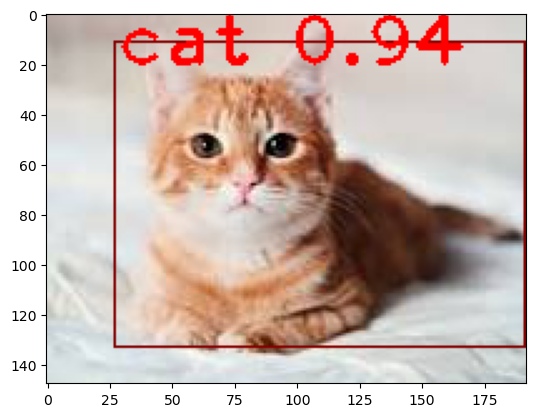

In [153]:
plotimage()

In [154]:
url='data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBwgHBgkIBwgKCgkLDRYPDQwMDRsUFRAWIB0iIiAdHx8kKDQsJCYxJx8fLT0tMTU3Ojo6Iys/RD84QzQ5OjcBCgoKDQwNGg8PGjclHyU3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3N//AABEIAJQAwAMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAADAAIEBQYBBwj/xAA7EAACAQMDAgQEBAUBCAMAAAABAgMABBEFEiExQQYTIlEyYXGBFCNCkQdSYqHB8DM0Q1NygrHRFSQl/8QAGQEAAwEBAQAAAAAAAAAAAAAAAQIDAAQF/8QAIhEAAgIDAAICAwEAAAAAAAAAAAECEQMSIRMxBEEUImFR/9oADAMBAAIRAxEAPwDTJJRi/pqMI2D4qUkRK1MrY1Xom8YrggpywUA2h6HIGKIATjA6V2OPAqZEg5XFYJHTJ57U/FEeMKflTlUEUAAsGugUQrim4rGEKIKSrRAvFYwzOBSLBfiOK65EaNI/QdB71VXdwZDt3ZzRGSstwa7uqPAxMS5POKKDWAwtcz703NIURB9KlSogOUsV2kKIBhFcxRMU2sBlLsG7OKkInFP/AAzA5oqxEDmlGAhaIqinFcV1AaBjoXpRA4SUg9zSA4+lMvIw0itg5Hq4oWUgr4PnoEUoztJqRIV8vqKpr1pUy0YJP7UuSWqsfHDbhcY+9IIazNxqV3a2zSyOfQB6cdPnU6ZruSM4mCsw3RsB2x3+9S/IiV/Gl/peBcUmIAyTgDqayNxr09gYoruQszvglP0gjIH7U+TVLl9sbTCQ7Rux+qt54mXxZe2XN9cmYfljcnbFV6YedYwhB75FHtrlFCm5j2uw469KSCKO7Eu44/lIroXVZL06LCP0qB7UUGmBSVya6BiiTbCA04Gh0qwobNdzQs13NEATNdoQNPB4ogHVw0ga7WAx+1a6I1rmKetajWDaJfam+WBRqYaFGsGy8UC5dYlWSY4xwtHZsVEv3DQqrDPOMUs1SLYeyFbyGUM5H5fbNQNQLTSJtJ2j9I70aKULAsMZ6U5rSQIMY/7jiuOcnLiOyKUXbIE9u8kBt8AvKCF45qJLePDapFPhSj+XkdRjr/r5VewQyf8AzCyPGyosBKntnpVR4iso2EAAO0NvBHuTk5/12pHCujrIm6KG/ivJbqEW35gtohK5IBOD/ihzbtnn7gVfJh2H54rQ6YbRJjK64mnUIxz8QAAx/ao2k6fJH4cZJl8siZliaTGdo6Uyx30Pm7RX2uovJbusspWQJhXxjH0p/huWT8c9tfSNJcA+gk5wPeod3ZSWqgqAUPILHOT9qqbDUJbPXYpCQoXAkwckD3NUhJrjBKKdtHq9hE8dsEmYs4Y5b3o2wULTrhL20W4iOVfkGpOK64nmy9gdlLbRSK5RFGbaWKfSrGGYpc0/FcxRBY3Nd3UttNIrAJ3l0tmKLmugZpxegdtIRZouK6vWgYiyQcdP7VUX74BAbBrQswxzmszrWAVjDeqVsDHUCuX5Tep2fES2KyT8RJNEYJY4k3ADeCc/Osd4/iuJtSurbUL66EMSKw8sE7UP6goI3d+K2urWUixIwGVAAyDioc9tFq0KLqEC3QjGFdWZHX5bhjNcmOWkundkjvHhk/4N+IdUtbqGyvppZbG4fy0jlJJQ9iuecdeOlela06ZlAP8Aszms3+CsdKtEGjWX4e4LZ82Ri7fuckVd6Zbfj4C85Yhxg578U8sm7qJKGHxraTM0Lj/9Y3DlVjs7SSTGfiwRXlHinXLvxOIL+5muZZy7iSHH5MIyNgQDvjOSa3X8R7WexvoVhZlMoK+n26H7GrKw0zw9Np0T3GiJNOFG54maMv8A9QUjJquPIoL9hMuBzacSt/hzpN7eaPezNqVxHAiDYjHI3d+etU2pzz210jHY208SJ39wa0uravNHZiw0yFLGzU4EcaY/v1zWS1e2uUtFkl37VfO5hUrU5WdEU4QpnrP8Mb+S/wBOmik2+XGw28jPPatbJHjvXivhrW7jw/DutdrCZRu3VZJ/Ea9S5AliUp329a6ceRVTOLLgk5No9UKmmEYqH4b1601u2V4XGcDcpPINXTQBhkYIq3Dldr2QBS3VIaHFDZKNAsEXpB6TRntXPLYVqNY7eKaWoRBBppatQLLjcDT1YYoAGK7uxTaoFh8ilxUfzOaeJaFBsey5FVN3ZwrcC4nbG0dz0q08z50OSNZ1KuAfrUssNkVxT1ZktR1Bbm8ESkC2A5Pcmp8OnpDAJYMuGGcYGfpVhJaxxt/sxn361JjT0gYrnjivsjqnm4lEqtPtJLmRRc2xTknc+BgVKvYnsgCI4/w4BO7dhgfbFT1CxAnaBVXrUtzfWUtvZr62UqGf4Qff51WGJRQqzOU++jOanod34nnM1xFDa2EMvolYlnmA68YwBn5moN1Z3dpfK1ssLR5wyecu4j5CtjHevDBFHdAo+NuV6E/4qPcyZ6tx9FPH7UZY00F/IkpP/DG6zpcBgN0v5TSdQ3vVM1x+MC200r4ORtUAg8fWttqkieTtjYFR/NnH9ulZS/gS6cSXEcaiLncoz/fqKk4Jeh45G10yurq9oy28Tbii9OhqmSU7ssTnvkVI1i4D3sh3FVzwCdy/+xUWV2GG6gDr1x9+4plFUZzdl3o+q3FjcrLaSMj9+eDXpegePWkKJqCBf6wePvXjcUpU5Wp9pqLCQK54oJyj6M4xmun0la3kF5GrxsCD3BpzRZ6GvDdL8R32mSA28zGL+Q1qR/FG3iVVlglLY5IFXjkTOSeFo9EMRBpyx9iKyOlfxB0q+IBkMTHs/Fae11S2uFDJKrA+1UTTJOLQZ4Ae1RpLb2BqWZl7Gnj1DNFCjF5HNNOMZFdY57UJfbpWMOx8qVHUoVHPNN2Z5FCg2C5FJnwART2Xiof4lVlaNhg9qnllqi2KO3SbuDDJFCZtpypqO0xU8n007G74TU4zTKSg0SPNVhhqHK2IyFGOPahoh3c11w23rVUyLRAuirDLftVRczOp/KTpVtdBUUyO4CjqahXcWE3KMjru9qVseKKU2ZLtNOcg84Has/r+qW8ZNpbsGYfEU7Ci+IZry7c29jKSSfiTIC1SLoNxaRme8mQnqctUXJfR1Rg/symo/wC+SZA5PqA/8ihxkRHD8qeoqZrMQWZWi5H+KrHJLbetMnwVqmTAoVsLyvUGk6hTuWgxMVABqWFDRnHNB8ChC7xgE80RvzEGOtQGjw2WqysnVSoeikrA5cFBBJ/IfrWl0i5u7dQsUzqR86kaX+EkCggZNaO0021PIAqvif0R8q+0E0rxDPEv/wBt8kd81pNL8S2d23lJOhcdi1ZC/wDCrXj5ikaNT/KcULT/AAFJbXS3CXcgYH3p4xkiM5QZ6VezG2RXAyCa7FPHOm7vXQVZjDMMo4/aoxsjA+2NzjqPpQEQV0PLIeRTYLoo/ly8ex96QlKjBFDmCyLx1o3QasnhsjPaoGpQZHnJwy80a0cvEAeq8GnXIJQlfvUMv7I6MP6vhTR3glbY3brUmItGPR0NQbxFzujGD8qhSX81oQSuQD1Fce2vs7tNvRqoZMpyKeXXYOcVnrLWkmbOTxwf3qVdanbJnLdBmrxzLW7OeWB7VRLuTCVdHw0bjsMmqpopZYPJLlVU4z0yKiS6zECTCAT1NRfx1xdvmMnaM9O9Sln2LQ+O49JD29paqzRoGdfibvVDqdoLsFnzjucen9jV9BalmBuXUA9FB4NU/ibWIrG0e2SANkYGDgiirl/DNqL51nnGtyh7ry4lIEZxyO1U8yCOUNjAParmC0e8nJG5Iw25mf2ouoaUiRAopCN8LdzVVJLgjV9ZRueRipEEuBtoBjIOG6inRwzSMAi9+tPVk9qH3TYIpscm4gVcR6BJPGAzHd8qm2HhGfeCQx+oqkYkpTQzS3ZStbHTHlbG0VFsPDksfVCcfKtHYac8ePyyOKqiDaJlm0vVhxVtAxwOabbW7bQDGRUtYVA5GKYRhreQTRtIfixiixDcgRuvVW+dQ41VQdu4Z60YMFIwx46A0mrDsOwDkFcMOtDeAH4akSFJsN8LDqab6l6YIoNDJgwBDEcLQJiSMKx3GpcgVkOT9qivEzsojPQdahOzpx0U0xkLtuQkKeq1AlKzFtmeOzDB/atI9psh2Rn1E5Y1R6hbxkllKhwf0tzn51yTgzshNMrJYBGvmxDa7dugqRAFu0ZZFB9PLCgLN61gmGWLekNxkfKp/lLYfmSr6m+FM80uhRzBWtjb+r8s4yB9qJMotoneGM+6gDrRvxiLEWfbHu52Zy2PtVNfF7uTclzN5TYBVDt289aKikI5SZKur63tYBJf30MQAyMvjP2rL6lr2kSzbLYT3b9giHaf3o+q6LZLvJt/NaQELK7ZOakxfgoba28qL1oQNwHU1RSS4Lq2U1vfR3bhEt3Mg+GJo9gB+fvUXVdP1MH8ROyED9APStP4gu7GOzaUsqSxnKENg/SqOXULvWoMadYXThlwWEZ206ViOVIym03N3hEPXH3rceH/AAxLOFeeMKvzq+8H+C7O0tlur9M3DckMfh+1bGO3iAxAgx9K6oxpHDPJbKSz0S1gVfQCR8qtEtokGAnH0qYIJP6V+1LyBjmSqEmwCpEP0URXjHAQCiCJB1p35Y9s0QDvMXFMMi+1LzEHTn5U0njhaKFZ3Pkvt9/2o0eyRtrrjPTHSuFQxyRzS5UcVjHWtsHFM8tl4yTTxcy9GQEV3zRwcGsYGUJOC2Aep9qUa+Srhec04uuc4/emtNGe+PtQcUOptAhBOQMJuB6881n9X0u/iledIXD7/QyDORxjI/etEtztOAc1NjuCY8sM9sEVKWFMrHNJGQ8PxtNq08txaSJsj9HmoQFbPO3NW+qwQ7cSRo0snpUEZOauVMbDJXbj2pjOgPooeFVQXnbd0eLeIYLu2eeOaYj/AJcwGCCP0ke3zoGkapdRRrb3rmOUZ8uUnIYexr2xtpBBRSMdCM0B4ba4G2a1hYezRg/4qa+N/S35n8PPIPxEqmOJPP8AMXhE9RzUi18GardqfNlS0hdtxBG9h9B2r0CGK3tlxFHHEP6QBXXmUA5l4p/Avsk/ky+jO6d4L0mzkE08Ju5+vmTrn9h2q8WJYxiKNVA7AcURZzgFkyvvjFGIhkHwlPmDVFGiTm5PpDOQeSB9AK4d3UOw+nFSjarkEsMHuKRtl2/lyjPsRRFIZaY/8R9vtuoTI/aRz9TRpVkjbbIwHsccGhurDhs0TDD5qjIw33p8c4Zcxp0OGB60w4UZJ+9MK+oSxNhwefYisALKS3wkBux5oMN7IreXMoDjofepaurjIUjHXjpQ5ZIxy6fQ460QExTRQKVKsAcQACcUwcqTSpVkYYvPUU6SJOPSKVKsEH5ahgQKczEc5pUqJhqsS3JoiAUqVEByQY6EigsM9Sf3rlKsE5tGK5FGud2ORSpUph5/McBq7P8Al7AvQnHNKlRAFbKkKD6fauzIsYBTiuUqUZHZEWWMhxkVVRSNlkzlVOBmu0qyMFB3kqwGKg/BclATt9jSpUUAKcpkqzA47GmpcStlXbeP6hmlSogP/9k='

In [155]:
def detect(url,shape=(20,10),accu_score=0.6,box_width=1,textsize=2):
    img=Image.open(urlopen(url))
    img=np.array(img)
    height,width,channels=img.shape
    blob=cv2.dnn.blobFromImage(img,1/255,(416,416),(0,0,0),swapRB=True,crop=False)
    yolov3.setInput(blob)
    layeroutput=yolov3.forward(output_layer)
    boxes=[]
    confidences=[]
    class_ids=[]
    for output in layeroutput:
        for detection in output:
            score=detection[5:]
            class_id=np.argmax(detection[5:])
            confidence=score[class_id]
            if confidence >0.7:
                x1=int(detection[0]*width)
                y1=int(detection[1]*height)
                w=int(detection[2]*width)
                h=int(detection[3]*height)
                x=int(x1-w/2)
                y=int(y1-h/2)
                boxes.append([x,y,w,h])
                confidences.append(float(confidence))
                class_ids.append(class_id)
    index=cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)
    font=cv2.FONT_HERSHEY_PLAIN
    colors=[random.uniform(0,255) for i in range(len(boxes))]
    for i in range(len(boxes)):
        if i in index:
            x,y,w,h=boxes[i]
            label=str(classes[class_ids[i]])
            color=colors[i]
            confi=str(round(confidences[i],2))
            cv2.rectangle(img,(x,y),(x+w,y+h),color,1)
            cv2.putText(img,label+' '+confi,(x,y+10),font,1,(255,255,0),1)
    print(f'No. of objects detected = {len(index)}')
    figure(num=None,figsize=shape)
    plt.imshow(img)
    plt.show()

No. of objects detected = 4


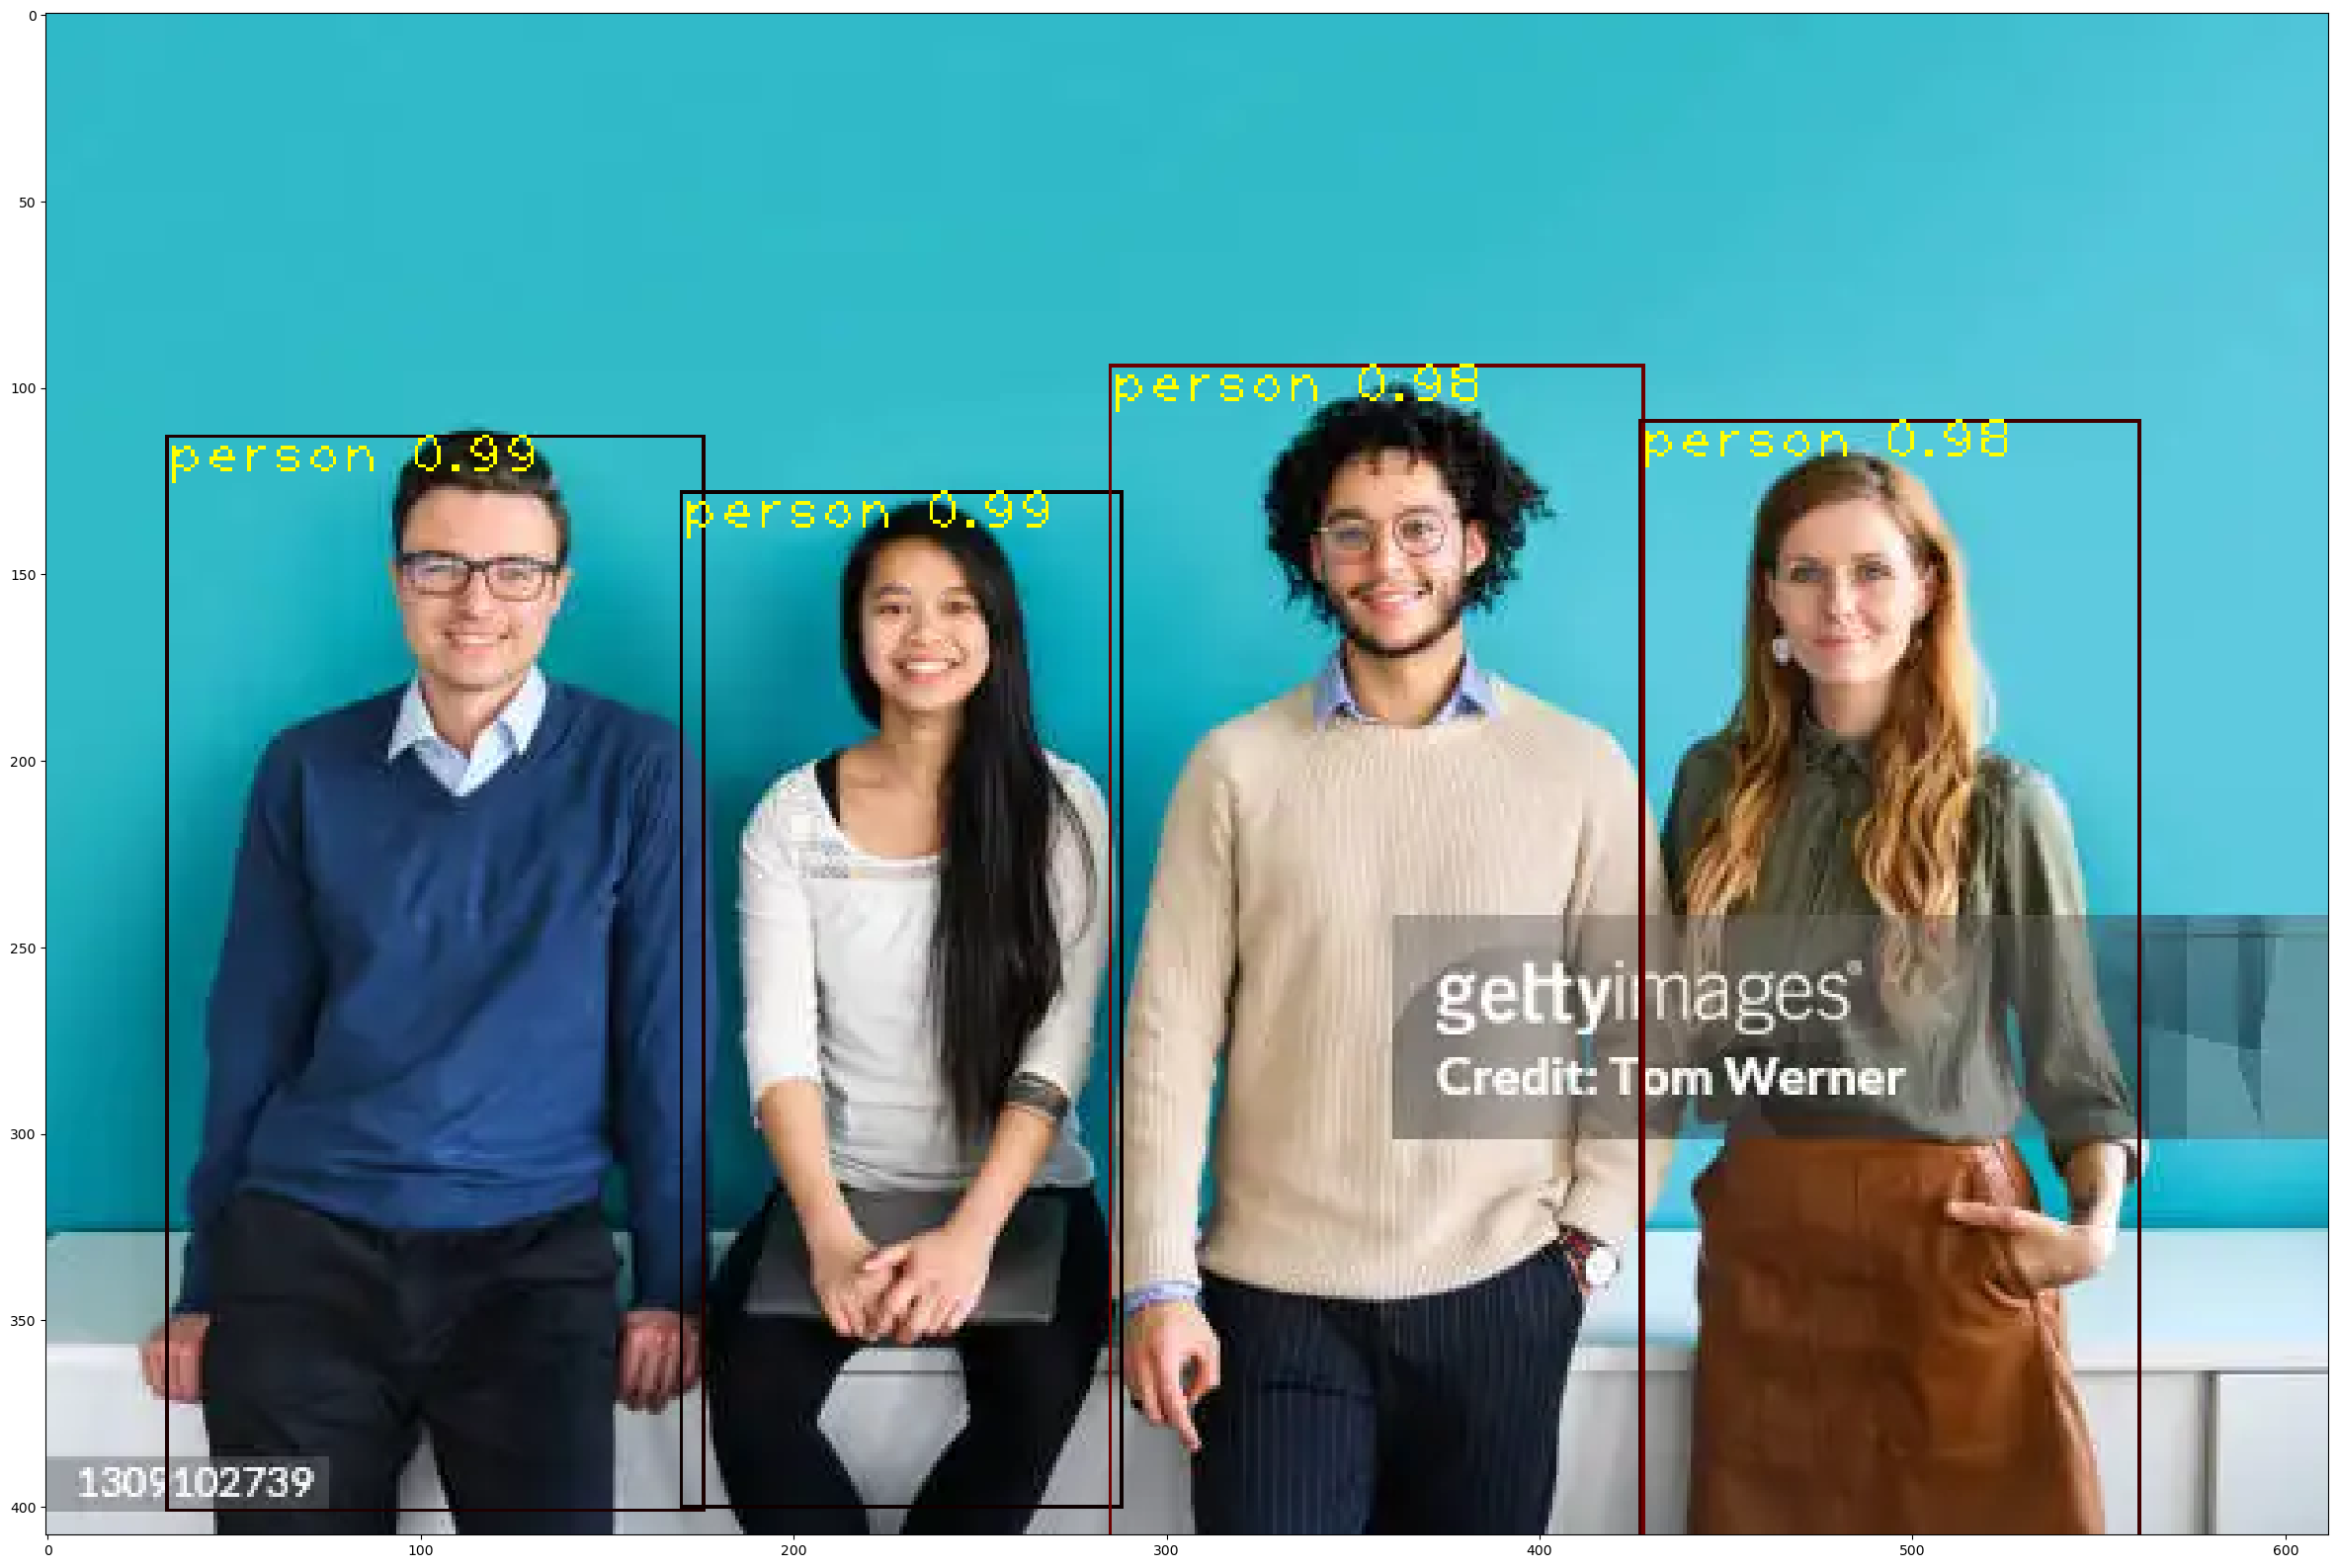

In [156]:
detect('https://media.gettyimages.com/id/1309102739/photo/portrait-of-office-colleagues-standing-in-front-of-partition-wall.webp?s=612x612&w=gi&k=20&c=-QyZcSGmfWDBqz43TXYNYH6JR5YmKxr-0NqUCUu2MfY=',(30,20),accu_score=0.5)

No. of objects detected = 1


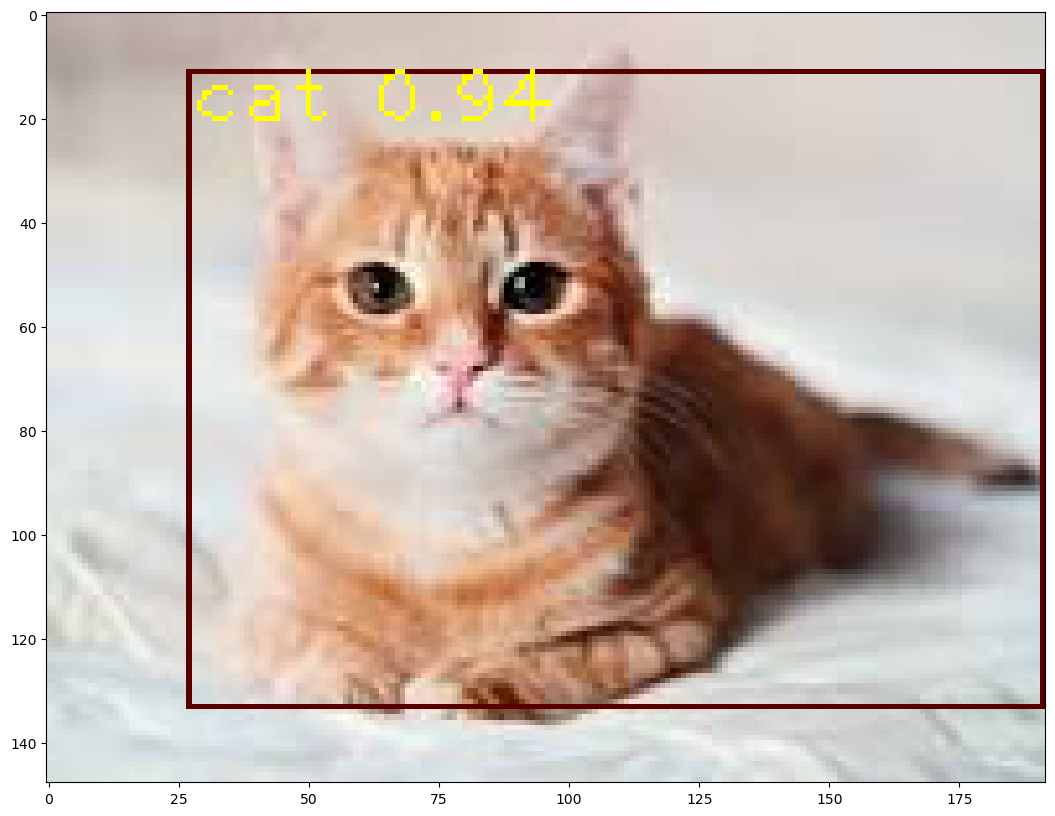

In [157]:
detect(url)

No. of objects detected = 2


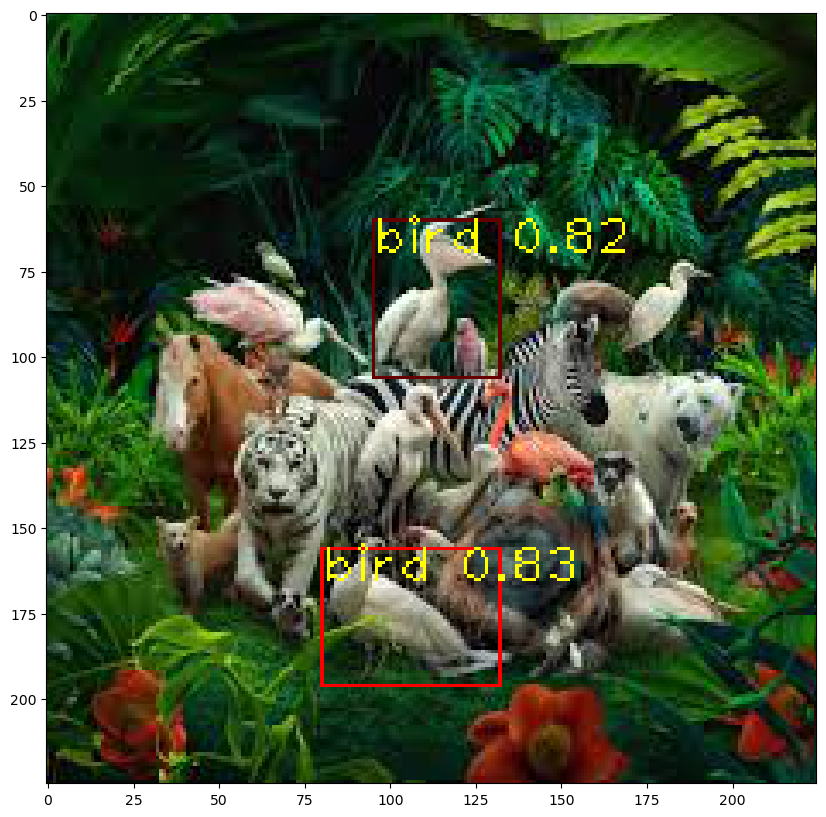

In [158]:
detect('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRB7v83kHNEPyAfGMX6Uo2XPPPo3zqdkTeF7Q&usqp=CAU')